<a href="https://colab.research.google.com/github/Laaliji/DBSCAN-Machine-Learning-Algorithm/blob/main/DBSCANML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install faker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 7.4 MB/s eta 0:00:00


In [39]:
import pandas as pd
from faker import Faker
from sklearn.datasets import make_blobs

# Create a Faker object
fake = Faker()

# Generate clustered data
clusters, _ = make_blobs(n_samples=1000, centers=5, cluster_std=1.0, random_state=42)

# Create a DataFrame with id, longitude, and latitude
data = {'id': [], 'longitude': [], 'latitude': []}
for idx, (long, lat) in enumerate(clusters):
    data['id'].append(fake.uuid4())
    data['longitude'].append(long)
    data['latitude'].append(lat)

# Create a DataFrame from the generated data
df = pd.DataFrame(data)

# Save the DataFrame to an Excel file
df.to_excel('clustered_data.xlsx', index=False)

# Display a message
print("Data has been saved to 'clustered_data.xlsx'")


Data has been saved to 'clustered_data.xlsx'


In [40]:
import pandas as pd

# Read the Excel file
df = pd.read_excel('clustered_data.xlsx')

# Display the DataFrame
print(df)


                                       id  longitude  latitude
0    4abbab8c-e4da-414f-a730-0ae90b7a0251   5.020077  2.583755
1    a7fcb3bf-f685-4222-a9ed-519b9732825d   3.232367  1.195353
2    7f754124-7609-4f4c-a84c-344f0021b121  -6.107928 -9.728652
3    579a186e-089f-4ab4-ae22-9834e32a00f9   5.199669  3.053950
4    543d69fb-2d06-42b7-8b92-8dfd6e774507   1.380819  4.593374
..                                    ...        ...       ...
995  bf43be69-d76c-4761-8fba-73db8dfc52b5  -4.633093  8.488531
996  0620614a-7769-4712-90b6-e295501cadab   3.291693  2.716434
997  871c1faa-5572-4299-8305-31c0885951f4  -9.447840  7.136552
998  78b7dd8e-dde9-435f-b79c-e44dac5493c5   4.604890  3.743970
999  73a17469-86b2-4e46-872d-90d5d5c56882  -7.814265  7.916050

[1000 rows x 3 columns]


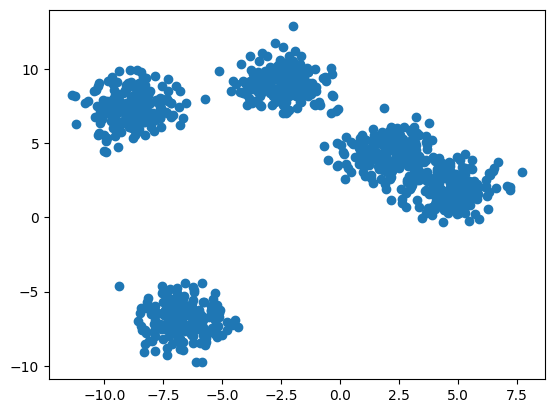

In [41]:
lat_long = df[['latitude', 'longitude']]
lat, longg = df.latitude, df.longitude

plt.scatter(longg, lat)

In [42]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np

X = lat_long.to_numpy()

dbscan_cluster_model = DBSCAN(eps=0.3, min_samples=8).fit(X)
dbscan_cluster_model

DBSCAN(eps=0.3, min_samples=8)

In [43]:
df['cluster'] = dbscan_cluster_model.labels_

df

,id,longitude,latitude,cluster
0,4abbab8c-e4da-414f-a730-0ae90b7a0251,5.020077,2.583755,6
1,a7fcb3bf-f685-4222-a9ed-519b9732825d,3.232367,1.195353,-1
2,7f754124-7609-4f4c-a84c-344f0021b121,-6.107928,-9.728652,-1
3,579a186e-089f-4ab4-ae22-9834e32a00f9,5.199669,3.053950,-1
4,543d69fb-2d06-42b7-8b92-8dfd6e774507,1.380819,4.593374,0
...,...,...,...,...
995,bf43be69-d76c-4761-8fba-73db8dfc52b5,-4.633093,8.488531,-1
996,0620614a-7769-4712-90b6-e295501cadab,3.291693,2.716434,19
997,871c1faa-5572-4299-8305-31c0885951f4,-9.447840,7.136552,1
998,78b7dd8e-dde9-435f-b79c-e44dac5493c5,4.604890,3.743970,-1


In [44]:
df['cluster'].value_counts()

-1     475
 0     106
 4      72
 3      68
 2      56
 1      33
 5      33
 8      19
 6      16
 14     16
 9      12
 13     12
 11     11
 12      9
 20      9
 7       9
 17      8
 15      7
 21      7
 10      6
 18      6
 16      5
 19      5
Name: cluster, dtype: int64

In [45]:
import plotly.express as px

fig = px.scatter(x=longg, y=lat, color=df['cluster'])

fig.show()

In [46]:
from sklearn.metrics import silhouette_score as ss

ss(X, df['cluster'])

-0.27177996273349825

In [47]:
epsilons = np.linspace(0.01, 1, num=15)
epsilons

array([0.01      , 0.08071429, 0.15142857, 0.22214286, 0.29285714,
       0.36357143, 0.43428571, 0.505     , 0.57571429, 0.64642857,
       0.71714286, 0.78785714, 0.85857143, 0.92928571, 1.        ])

In [48]:
min_samples = np.arange(2, 20, step=3)
min_samples

array([ 2,  5,  8, 11, 14, 17])

In [49]:
import itertools

combinations = list(itertools.product(epsilons, min_samples))
combinations

[(0.01, 2),
 (0.01, 5),
 (0.01, 8),
 (0.01, 11),
 (0.01, 14),
 (0.01, 17),
 (0.08071428571428571, 2),
 (0.08071428571428571, 5),
 (0.08071428571428571, 8),
 (0.08071428571428571, 11),
 (0.08071428571428571, 14),
 (0.08071428571428571, 17),
 (0.15142857142857144, 2),
 (0.15142857142857144, 5),
 (0.15142857142857144, 8),
 (0.15142857142857144, 11),
 (0.15142857142857144, 14),
 (0.15142857142857144, 17),
 (0.22214285714285714, 2),
 (0.22214285714285714, 5),
 (0.22214285714285714, 8),
 (0.22214285714285714, 11),
 (0.22214285714285714, 14),
 (0.22214285714285714, 17),
 (0.29285714285714287, 2),
 (0.29285714285714287, 5),
 (0.29285714285714287, 8),
 (0.29285714285714287, 11),
 (0.29285714285714287, 14),
 (0.29285714285714287, 17),
 (0.3635714285714286, 2),
 (0.3635714285714286, 5),
 (0.3635714285714286, 8),
 (0.3635714285714286, 11),
 (0.3635714285714286, 14),
 (0.3635714285714286, 17),
 (0.4342857142857143, 2),
 (0.4342857142857143, 5),
 (0.4342857142857143, 8),
 (0.4342857142857143, 11),
 

In [50]:
N = len(combinations)
N

90

In [51]:
def get_scores_and_labels(combinations, X):
  scores = []
  all_labels_list = []

  for i, (eps, num_samples) in enumerate(combinations):
    dbscan_cluster_model = DBSCAN(eps=eps, min_samples=num_samples).fit(X)
    labels = dbscan_cluster_model.labels_
    labels_set = set(labels)
    num_clusters = len(labels_set)
    if -1 in labels_set:
      num_clusters -= 1

    if (num_clusters < 2) or (num_clusters > 50):
      scores.append(-10)
      all_labels_list.append('bad')
      c = (eps, num_samples)
      print(f"Combination {c} on iteration {i+1} of {N} has {num_clusters} clusters. Moving on")
      continue

    scores.append(ss(X, labels))
    all_labels_list.append(labels)
    print(f"Index: {i}, Score: {scores[-1]}, Labels: {all_labels_list[-1]}, NumClusters: {num_clusters}")

  best_index = np.argmax(scores)
  best_parameters = combinations[best_index]
  best_labels = all_labels_list[best_index]
  best_score = scores[best_index]

  return {'best_epsilon': best_parameters[0],
          'best_min_samples': best_parameters[1],
          'best_labels': best_labels,
          'best_score': best_score}

best_dict = get_scores_and_labels(combinations, X)

Combination (0.01, 2) on iteration 1 of 90 has 1 clusters. Moving on
Combination (0.01, 5) on iteration 2 of 90 has 0 clusters. Moving on
Combination (0.01, 8) on iteration 3 of 90 has 0 clusters. Moving on
Combination (0.01, 11) on iteration 4 of 90 has 0 clusters. Moving on
Combination (0.01, 14) on iteration 5 of 90 has 0 clusters. Moving on
Combination (0.01, 17) on iteration 6 of 90 has 0 clusters. Moving on
Combination (0.08071428571428571, 2) on iteration 7 of 90 has 120 clusters. Moving on
Combination (0.08071428571428571, 5) on iteration 8 of 90 has 0 clusters. Moving on
Combination (0.08071428571428571, 8) on iteration 9 of 90 has 0 clusters. Moving on
Combination (0.08071428571428571, 11) on iteration 10 of 90 has 0 clusters. Moving on
Combination (0.08071428571428571, 14) on iteration 11 of 90 has 0 clusters. Moving on
Combination (0.08071428571428571, 17) on iteration 12 of 90 has 0 clusters. Moving on
Combination (0.15142857142857144, 2) on iteration 13 of 90 has 178 clus

In [52]:
best_dict

{'best_epsilon': 1.0,
 'best_min_samples': 2,
 'best_labels': array([ 0,  0,  1,  0,  0,  1,  2,  0,  0,  0,  0,  1,  2,  1,  2,  1,  3,
         2,  3,  0,  0,  3,  2,  1,  3,  0,  3,  2,  0,  2,  0,  2,  0,  2,
         3,  1,  0,  0,  0,  3,  0,  2,  2,  1,  2,  1,  0,  0,  3,  1,  0,
         2,  1,  3,  3,  3,  3,  1,  1,  3,  0,  2,  1,  0,  1,  0,  2,  2,
         0,  0,  2,  1,  0,  1,  2,  3,  2,  0,  0,  2,  3,  0,  1,  1,  2,
         0,  3,  0,  3,  2,  0,  2,  0,  0,  0,  1,  3,  3,  1,  2,  1,  0,
         0,  1,  3,  0,  3,  1,  0,  3,  3,  0,  1,  1,  2,  3,  2,  1,  3,
         3,  1,  3,  1,  1,  1,  1,  2,  1,  3,  0,  0,  2,  0,  0,  1,  0,
         0,  0,  3,  2,  1,  3,  0,  3,  0,  0,  1,  0,  0,  0,  2,  1,  0,
         0,  3,  0,  0,  3,  2,  0,  2,  0,  2,  3,  2,  0,  0,  2,  3,  0,
         1,  3,  3,  1,  0,  1,  2,  1,  0,  0,  0,  3,  0,  2,  0,  0,  0,
         1,  2,  3,  2,  3,  0,  0,  0,  3,  0,  1,  3,  0,  1,  2,  1,  1,
         2,  0,  0,  3,  0,

In [53]:
df['cluster'] = best_dict['best_labels']

df['cluster'].value_counts()

 0    397
 2    201
 1    199
 3    199
-1      4
Name: cluster, dtype: int64

In [54]:
fig = px.scatter(x=longg, y=lat, color=df['cluster'])
fig.show()

In [55]:
df

,id,longitude,latitude,cluster
0,4abbab8c-e4da-414f-a730-0ae90b7a0251,5.020077,2.583755,0
1,a7fcb3bf-f685-4222-a9ed-519b9732825d,3.232367,1.195353,0
2,7f754124-7609-4f4c-a84c-344f0021b121,-6.107928,-9.728652,1
3,579a186e-089f-4ab4-ae22-9834e32a00f9,5.199669,3.053950,0
4,543d69fb-2d06-42b7-8b92-8dfd6e774507,1.380819,4.593374,0
...,...,...,...,...
995,bf43be69-d76c-4761-8fba-73db8dfc52b5,-4.633093,8.488531,3
996,0620614a-7769-4712-90b6-e295501cadab,3.291693,2.716434,0
997,871c1faa-5572-4299-8305-31c0885951f4,-9.447840,7.136552,2
998,78b7dd8e-dde9-435f-b79c-e44dac5493c5,4.604890,3.743970,0
